# Data import and cleaning

In [1]:
# Import required packages
# pip install pystan
# conda install -c conda-forge fbprophet
# conda update -n base -c defaults conda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fbprophet import Prophet

In [2]:
# Read the dataset
df_ilu = pd.read_csv('data/ILULISSAT1.txt',delimiter= '\s+', header=None)
df_ilu.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1824,-161,-196,-160,-59,15,57,81,42,7,-57,-90,-126
1,1825,-999,-999,-999,-999,-999,-999,54,-999,-999,-63,-136,-180
2,1826,-184,-999,-204,-234,-31,-6,-999,-999,6,-51,-60,-118
3,1827,-186,-74,-197,-105,-22,-999,-999,-999,-999,-999,-999,-999
4,1828,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [3]:
# Change column names
df_ilu.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [4]:
df_ilu = df_ilu.replace(-999, np.nan)

In [5]:
df_ilu[df_ilu.Jan.isna()==True]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1825,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,-63.0,-136.0,-180.0
4,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.0,-52.0,-108.0
28,1852,NaN,NaN,NaN,NaN,NaN,54.0,74.0,NaN,17.0,-25.0,-76.0,-113.0


In [6]:
# df_ilu_long['Temp'] = df_ilu_long.Temp.fillna(df_ilu_long.Temp.rolling(4,min_periods=1).mean())
for i in df_ilu.columns:
    df_ilu[i] = df_ilu[i].fillna(df_ilu[i].rolling(6, min_periods=1).mean())
    
for i in df_ilu.columns:
    df_ilu[i] = df_ilu[i].fillna(df_ilu[i].rolling(6, min_periods=1).mean())

In [7]:
df_ilu.head(40)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1824,-161.0,-196.0,-160.0,-59.000000,15.000000,57.000000,81.000,42.00,7.000000,-57.0,-90.000000,-126.000000
1,1825,-161.0,-196.0,-160.0,-59.000000,15.000000,57.000000,54.000,42.00,7.000000,-63.0,-136.000000,-180.000000
2,1826,-184.0,-196.0,-204.0,-234.000000,-31.000000,-6.000000,67.500,42.00,6.000000,-51.0,-60.000000,-118.000000
3,1827,-186.0,-74.0,-197.0,-105.000000,-22.000000,25.500000,67.500,42.00,6.500000,-57.0,-95.333333,-141.333333
4,1828,-177.0,-135.0,-187.0,-132.666667,-12.666667,25.500000,67.500,42.00,6.500000,-57.0,-95.333333,-141.333333
5,1829,-177.0,-135.0,-187.0,-132.666667,-12.666667,25.500000,67.500,42.00,6.500000,-39.0,-52.000000,-108.000000
6,1830,-71.0,-158.0,-184.0,-78.000000,-26.500000,-6.000000,54.000,42.00,29.000000,-50.0,-107.000000,-129.000000
7,1831,-121.0,-153.0,-155.0,-54.000000,19.000000,-6.000000,64.800,42.00,17.500000,-82.0,-99.000000,-97.000000
8,1832,-187.0,-252.0,-288.0,-108.000000,-1.500000,12.900000,64.125,42.00,29.000000,-80.0,-138.000000,-248.000000
9,1833,-210.0,-207.0,-124.0,-76.000000,19.000000,9.750000,63.000,61.00,11.000000,-71.0,-133.000000,-226.000000


In [8]:
df_ilu.isna().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64

In [9]:
# Convert wide to long
df_ilu_long = pd.melt(df_ilu, id_vars='Year', value_vars=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

In [10]:
df_ilu_long.head(10)

,Year,variable,value
0,1824,Jan,-161.0
1,1825,Jan,-161.0
2,1826,Jan,-184.0
3,1827,Jan,-186.0
4,1828,Jan,-177.0
5,1829,Jan,-177.0
6,1830,Jan,-71.0
7,1831,Jan,-121.0
8,1832,Jan,-187.0
9,1833,Jan,-210.0


In [11]:
df_ilu_long['Date'] = df_ilu_long['variable'].astype(str) + '/1/' + df_ilu_long['Year'].astype(str)


In [12]:
df_ilu_long.index

RangeIndex(start=0, stop=2280, step=1)

In [13]:
df_ilu_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      2280 non-null   int64  
 1   variable  2280 non-null   object 
 2   value     2280 non-null   float64
 3   Date      2280 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 71.4+ KB


In [14]:
df_ilu_long['Date'] = df_ilu_long['Date'].astype('datetime64[ns]')

In [15]:
df_ilu_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      2280 non-null   int64         
 1   variable  2280 non-null   object        
 2   value     2280 non-null   float64       
 3   Date      2280 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 71.4+ KB


In [16]:
#df_ilu_long.set_index(df_ilu_long['Date'], inplace=True)

In [17]:
df_ilu_long.head(10)

,Year,variable,value,Date
0,1824,Jan,-161.0,1824-01-01
1,1825,Jan,-161.0,1825-01-01
2,1826,Jan,-184.0,1826-01-01
3,1827,Jan,-186.0,1827-01-01
4,1828,Jan,-177.0,1828-01-01
5,1829,Jan,-177.0,1829-01-01
6,1830,Jan,-71.0,1830-01-01
7,1831,Jan,-121.0,1831-01-01
8,1832,Jan,-187.0,1832-01-01
9,1833,Jan,-210.0,1833-01-01


In [18]:
df_ilu_long.columns = [ 'Year', 'Month', 'Temp', 'Date']

In [19]:
df_ilu_long.head(10)

,Year,Month,Temp,Date
0,1824,Jan,-161.0,1824-01-01
1,1825,Jan,-161.0,1825-01-01
2,1826,Jan,-184.0,1826-01-01
3,1827,Jan,-186.0,1827-01-01
4,1828,Jan,-177.0,1828-01-01
5,1829,Jan,-177.0,1829-01-01
6,1830,Jan,-71.0,1830-01-01
7,1831,Jan,-121.0,1831-01-01
8,1832,Jan,-187.0,1832-01-01
9,1833,Jan,-210.0,1833-01-01


In [20]:
df_ilu_long = df_ilu_long.replace(-999, np.nan)


In [21]:
#df_ilu_long['Temp'] = ""
for i in range(0, len(df_ilu_long)):
    df_ilu_long['Temp'][i] = df_ilu_long['Temp'][i]/10

<ipython-input-21-aef947773824>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ilu_long['Temp'][i] = df_ilu_long['Temp'][i]/10


In [22]:
df_ilu_long.head(-40)

,Year,Month,Temp,Date
0,1824,Jan,-16.1,1824-01-01
1,1825,Jan,-16.1,1825-01-01
2,1826,Jan,-18.4,1826-01-01
3,1827,Jan,-18.6,1827-01-01
4,1828,Jan,-17.7,1828-01-01
...,...,...,...,...
2235,1969,Dec,-12.7,1969-12-01
2236,1970,Dec,-10.8,1970-12-01
2237,1971,Dec,-21.7,1971-12-01
2238,1972,Dec,-13.5,1972-12-01


In [23]:
df_ilu_long.set_index(df_ilu_long['Date'], inplace=True)

In [24]:
df_ilu_long.index.names = ['Time']

In [25]:
df_ilu_long = df_ilu_long.sort_values(by='Date',ascending=True)

In [26]:
df_ilu_long['Temp'].describe()

count    2280.000000
mean       -5.102855
std         9.076289
min       -32.100000
25%       -12.100000
50%        -5.100000
75%         3.100000
max        11.000000
Name: Temp, dtype: float64

# EDA 

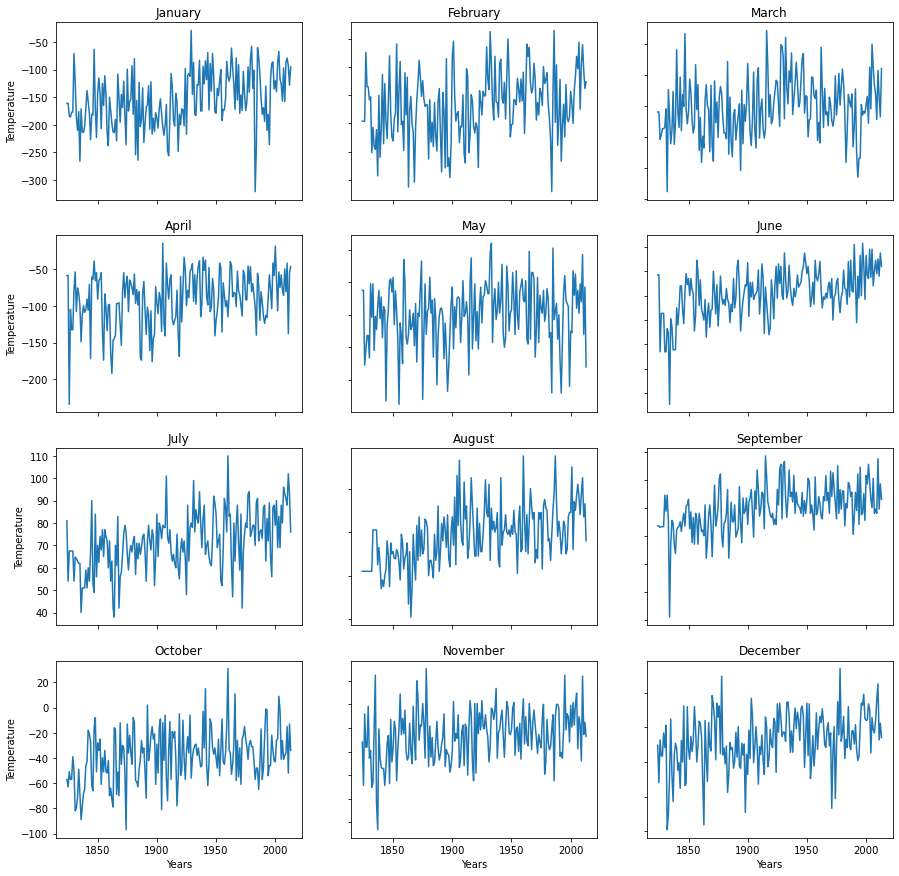

In [27]:
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, axs = plt.subplots(4, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

axs[0, 0].plot(df_ilu['Year'], df_ilu['Jan'])
axs[0, 0].set_title('January')
axs[0, 1].plot(df_ilu['Year'], df_ilu['Feb'])
axs[0, 1].set_title('February')
axs[0, 2].plot(df_ilu['Year'], df_ilu['Mar'])
axs[0, 2].set_title('March')
axs[1, 0].plot(df_ilu['Year'], df_ilu['Apr'])
axs[1, 0].set_title('April')
axs[1, 1].plot(df_ilu['Year'], df_ilu['May'])
axs[1, 1].set_title('May')
axs[1, 2].plot(df_ilu['Year'], df_ilu['Jun'])
axs[1, 2].set_title('June')
axs[2, 0].plot(df_ilu['Year'], df_ilu['Jul'])
axs[2, 0].set_title('July')
axs[2, 1].plot(df_ilu['Year'], df_ilu['Aug'])
axs[2, 1].set_title('August')
axs[2, 2].plot(df_ilu['Year'], df_ilu['Sep'])
axs[2, 2].set_title('September')
axs[3, 0].plot(df_ilu['Year'], df_ilu['Oct'])
axs[3, 0].set_title('October')
axs[3, 1].plot(df_ilu['Year'], df_ilu['Nov'])
axs[3, 1].set_title('November')
axs[3, 2].plot(df_ilu['Year'], df_ilu['Dec'])
axs[3, 2].set_title('December')


for ax in axs.flat:
    ax.set(xlabel='Years', ylabel='Temperature')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

In [28]:
df_ilu.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [29]:
df_ilu_long.size

9120

In [30]:
df_ilu_long.head()

,Year,Month,Temp,Date
Time,,,,
1824-01-01,1824,Jan,-16.1,1824-01-01
1824-02-01,1824,Feb,-19.6,1824-02-01
1824-03-01,1824,Mar,-16.0,1824-03-01
1824-04-01,1824,Apr,-5.9,1824-04-01
1824-05-01,1824,May,1.5,1824-05-01


In [31]:
df_ilu_long.loc[df_ilu_long['Month']=='7']

,Year,Month,Temp,Date
Time,,,,


In [32]:
df = df_ilu_long.iloc[:, [0,3]]

In [33]:
############# Interpolate missing data with a straight line
#df_ilu_long['Temp'].interpolate(method='linear', inplace=True)

In [34]:
df_ilu_long['Temp'] = df_ilu_long.Temp.fillna(df_ilu_long.Temp.rolling(4,min_periods=1).mean())

In [35]:
df_ilu_long.describe()

,Year,Temp
count,2280.000000,2280.000000
mean,1918.500000,-5.102855
std,54.859548,9.076289
min,1824.000000,-32.100000
25%,1871.000000,-12.100000
50%,1918.500000,-5.100000
75%,1966.000000,3.100000
max,2013.000000,11.000000


In [36]:
df_ilu_long.head(5)

,Year,Month,Temp,Date
Time,,,,
1824-01-01,1824,Jan,-16.1,1824-01-01
1824-02-01,1824,Feb,-19.6,1824-02-01
1824-03-01,1824,Mar,-16.0,1824-03-01
1824-04-01,1824,Apr,-5.9,1824-04-01
1824-05-01,1824,May,1.5,1824-05-01


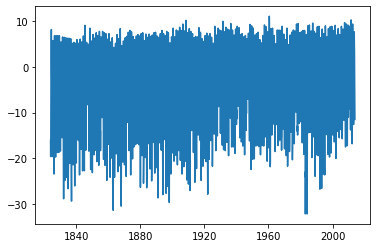

In [37]:
plt.plot(df_ilu_long.index.values, df_ilu_long['Temp'])

In [38]:
temp_moving_average = df_ilu_long.Temp.rolling(window=120).mean()

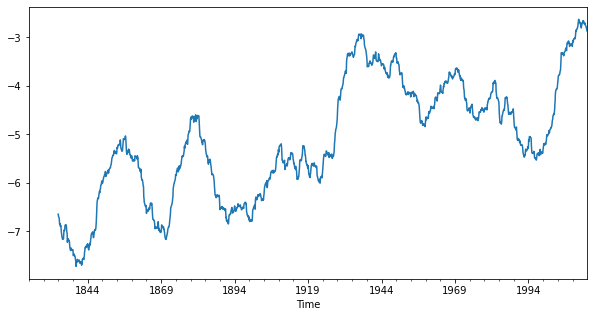

In [39]:
temp_moving_average.plot(figsize=(10, 5))

In [40]:
temp_moving_median = df_ilu_long.Temp.rolling(window=120).median()

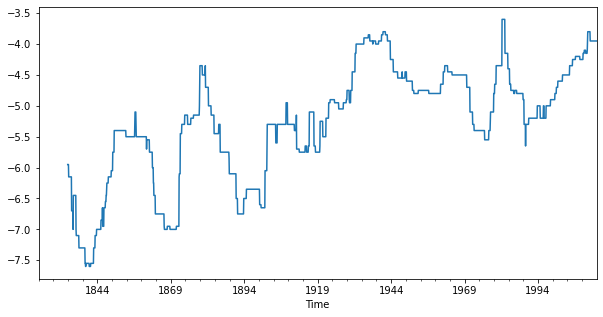

In [41]:
temp_moving_median.plot(figsize=(10, 5))

# Modeling

### Baseline Model

In [42]:
df_ilu_long.reset_index(inplace=True)

In [43]:
series_value = df_ilu_long['Temp']

In [44]:
series_value

0      -16.1
1      -19.6
2      -16.0
3       -5.9
4        1.5
        ... 
2275     5.6
2276     2.6
2277    -3.4
2278    -8.4
2279   -11.5
Name: Temp, Length: 2280, dtype: float64

In [45]:
value = pd.DataFrame(series_value)

In [46]:
shifted = pd.concat([value, value.shift(1)], axis=1)

In [47]:
shifted.head()

,Temp,Temp
0,-16.1,NaN
1,-19.6,-16.1
2,-16.0,-19.6
3,-5.9,-16.0
4,1.5,-5.9


In [48]:
shifted.columns = ['temperature', 'forecast']

In [49]:
# Use the wide datase for a line  graph per month
# play with rolling averages
# Arima 
# HOLT Winters
# FB prophet

In [50]:
temp_test = shifted[1:]

In [51]:
temp_test.head()

,temperature,forecast
1,-19.6,-16.1
2,-16.0,-19.6
3,-5.9,-16.0
4,1.5,-5.9
5,5.7,1.5


In [52]:
temp_error = np.sqrt(mean_squared_error(temp_test.temperature, temp_test.forecast))

In [53]:
# RMSE:
temp_error

5.762650705876562

### ARIMA - Auto Regressive (p) Integrated (d) Moving Averages (q)

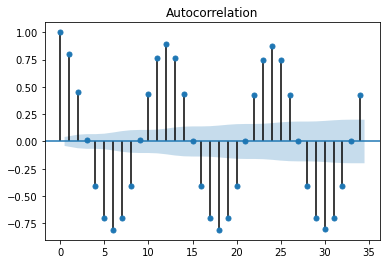

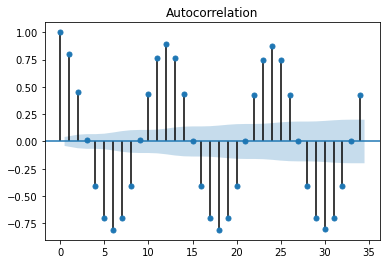

In [54]:
# Arima(p,d,q)
# Plot_acf will be used to identify the q
# d is the number we are going to give for correlation between months
plot_acf(temp_test.temperature)


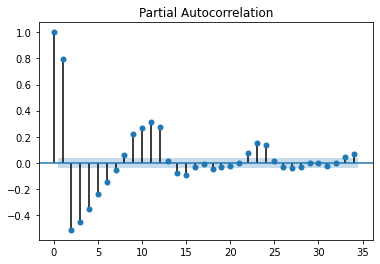

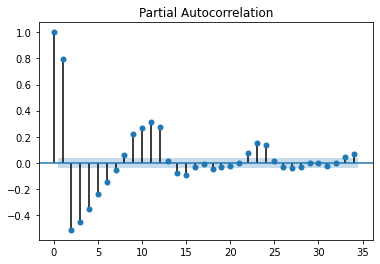

In [55]:
# To identufy the value of p
plot_pacf(temp_test.temperature)

In [56]:
# p= 2,3  d=0,1    q=2,3,4
#train, test = train_test_split(temp_test.temperature, test_size=0.2)

train = temp_test['temperature'][:1823]
test = temp_test['temperature'][1823:]

In [57]:
temp_model = ARIMA(train, order=(2,1,3))
temp_model_fit = temp_model.fit()
print('AIC = ',temp_model_fit.aic)
temp_forecast = temp_model_fit.forecast(steps=456)[0]
print('ARIMA RMSE = ',np.sqrt(mean_squared_error(test, temp_forecast)))

AIC =  9555.967259508205
ARIMA RMSE =  3.695757576158341


### Exponential Smoothing

In [58]:
HW_df = pd.Series(temp_test['temperature'])

In [59]:
HW_df.index.freq = 'MS'

In [60]:
HW_df.index.freq

'MS'

#### Simple Exponentional Smoothig

In [61]:
model = SimpleExpSmoothing(temp_test['temperature'])

In [62]:
span = 12

In [63]:
alpha = 2/(span + 1)

In [64]:
fit_model = model.fit(smoothing_level=alpha, optimized=False)


In [65]:
temp_test['ses'] = fit_model.fittedvalues.shift(-1)

<ipython-input-65-2f0d5ab4cfbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_test['ses'] = fit_model.fittedvalues.shift(-1)


In [66]:
temp_test['ses'].describe()

count    2278.000000
mean       -5.138297
std         3.179037
min       -19.600000
25%        -7.404180
50%        -4.784487
75%        -2.673054
max         1.832003
Name: ses, dtype: float64

In [67]:
print('RMSE = ',np.sqrt(mean_squared_error(test.iloc[0:455], temp_test['ses'].iloc[1823:-1])))

RMSE =  7.6364869859913185


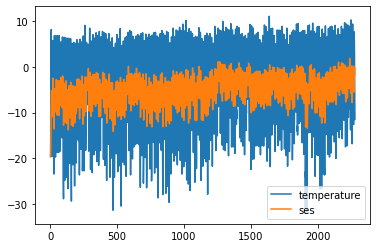

In [68]:
temp_test[['temperature', 'ses']].plot()

#### Double Exponentinal Smoothing

In [69]:
fit_mod = ExponentialSmoothing(temp_test['temperature']).fit()

In [70]:
temp_test['des'] = fit_mod.fittedvalues.shift(-1)

<ipython-input-70-46fa60779df6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_test['des'] = fit_mod.fittedvalues.shift(-1)


In [71]:
print('RMSE = ',np.sqrt(mean_squared_error(test.iloc[0:455], temp_test['ses'].iloc[1823:-1])))

RMSE =  7.6364869859913185


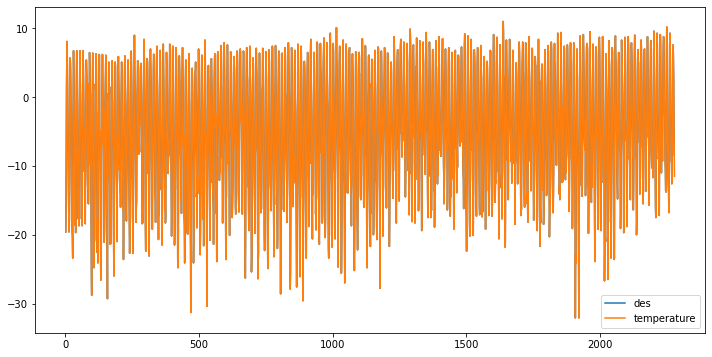

In [72]:
temp_test[['des', 'temperature']].plot(figsize=(12,6))

In [73]:
temp_test

,temperature,forecast,ses,des
1,-19.6,-16.1,-19.600000,-19.6
2,-16.0,-19.6,-19.046154,-16.0
3,-5.9,-16.0,-17.023669,-5.9
4,1.5,-5.9,-14.173873,1.5
5,5.7,1.5,-11.116354,5.7
...,...,...,...,...
2275,5.6,7.6,-0.510568,5.6
2276,2.6,5.6,-0.032019,2.6
2277,-3.4,2.6,-0.550170,-3.4
2278,-8.4,-3.4,-1.757836,-8.4


#### Triple Exponential Smoothing (Seasonality and Halt Winters)

In [74]:
# When seasonal='mul' gives error for using negative values

temp_test['tes'] = ExponentialSmoothing(temp_test['temperature'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues


<ipython-input-74-3e48f3b5accc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_test['tes'] = ExponentialSmoothing(temp_test['temperature'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues


In [75]:
print('Halt Winters RMSE = ',np.sqrt(mean_squared_error(test, temp_test['tes'].iloc[1823:])))

Halt Winters RMSE =  3.0873815379205882


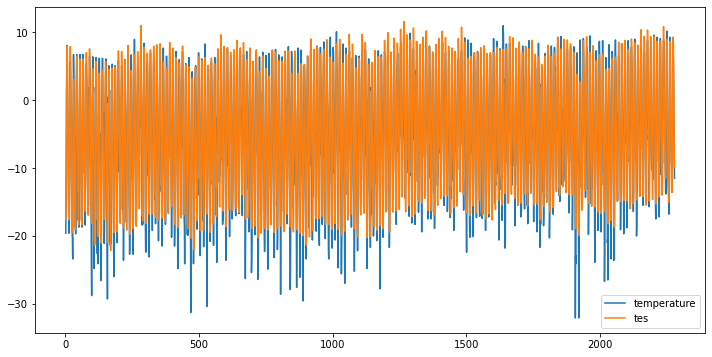

In [76]:
temp_test[['temperature', 'tes']].plot(figsize=(12,6))

### FBProphet

In [77]:
df = df_ilu_long.iloc[:, [0,3]]
df.columns = ['ds', 'y']

In [78]:
# Initialize the Model
model=Prophet(interval_width=0.95, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.095, holidays=None, )

In [79]:
model.fit(df)
future = model.make_future_dataframe(periods=200, freq='MS')
forecast = model.predict(future)

In [80]:
se = np.square(forecast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

3.180655000871368


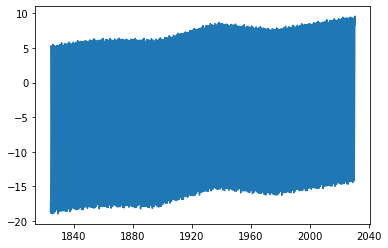

In [88]:
plt.plot(forecast['ds'], forecast['yhat'])